# Capstone Project

## Applied Data Science Capstone by IBM/Coursera

## Problem
In this project, I will be identifying the best neighborhoods to open an American restaurant in Madrid.

As a global city, Spain's capital and most populous city, there is already a lot of competition throughout the city.  Therefore I will try to identify neighborhoods without any American style restaurants, and the least amount of restaurants to compete with.

First I will Import the necessary libraries for the analysis.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge --no-deps altair --yes

!conda install -c conda-forge --no-deps vincent --yes

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy=1.19.0 --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize 

!conda install -c conda-forge branca
!conda install -c conda-forge --no-deps folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge

The following NEW packages will be INSTALLED:

    altair: 4.1.0-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - vincent


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge

The following NEW packages w

In [2]:
import requests #Libary to scrape table of districts and neighborhoods in Madrid from Wikipedia
from bs4 import BeautifulSoup

# Data

Here I will use a table from Madrid's Wikipedia page that lists all of the different Districts and Neighborhoods in the city.

In [3]:
res = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Madrid')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
df.head()

,District name (number),District location,Number,Name,Image
0,Centro (1),NaN,11,Palacio,NaN
1,Centro (1),NaN,12,Embajadores,NaN
2,Centro (1),NaN,13,Cortes,NaN
3,Centro (1),NaN,14,Justicia,NaN
4,Centro (1),NaN,15,Universidad,NaN


In [64]:
#Quick data cleansing to extract the District and Barrio(Neighborhood in Spanish)


df_madrid = df[["District name (number)","Name"]]
df_madrid = df_madrid.rename(columns={"District name (number)":"District", "Name":"Barrio"})
df_madrid["District"] = df_madrid["District"].str.split(" ").str[0]
df_madrid.head()

,District,Barrio
0,Centro,Palacio
1,Centro,Embajadores
2,Centro,Cortes
3,Centro,Justicia
4,Centro,Universidad


 # Methodology

For this report I will be focusing on the 5 most central districts in the metropolitan area of Madrid: Centro, Arganzuela, Retiro, Salamanca and Chameberí.  Here I will create a table with the 5 districts and the latitude and longitude coordinates of each neighborhood.  Then I will create a map with the points of each neighborhood.

In [5]:
df_madrid_barrios = df_madrid.loc[df_madrid["District"].isin(['Centro','Arganzuela','Retiro','Salamanca','Chamberí'])].reset_index(drop=True)
df_madrid_barrios

,District,Barrio
0,Centro,Palacio
1,Centro,Embajadores
2,Centro,Cortes
3,Centro,Justicia
4,Centro,Universidad
5,Centro,Sol
6,Arganzuela,Imperial
7,Arganzuela,Acacias
8,Arganzuela,Chopera
9,Arganzuela,Legazpi


In [6]:
#Here I created a new 'Location' column just to make it easier to get the exact coordinates.

df_madrid_barrios['Location'] = df_madrid_barrios['Barrio'] + "," + " " + df_madrid_barrios['District'] + "," + " " + "Madrid, Spain"
df_madrid_barrios

,District,Barrio,Location
0,Centro,Palacio,"Palacio, Centro, Madrid, Spain"
1,Centro,Embajadores,"Embajadores, Centro, Madrid, Spain"
2,Centro,Cortes,"Cortes, Centro, Madrid, Spain"
3,Centro,Justicia,"Justicia, Centro, Madrid, Spain"
4,Centro,Universidad,"Universidad, Centro, Madrid, Spain"
5,Centro,Sol,"Sol, Centro, Madrid, Spain"
6,Arganzuela,Imperial,"Imperial, Arganzuela, Madrid, Spain"
7,Arganzuela,Acacias,"Acacias, Arganzuela, Madrid, Spain"
8,Arganzuela,Chopera,"Chopera, Arganzuela, Madrid, Spain"
9,Arganzuela,Legazpi,"Legazpi, Arganzuela, Madrid, Spain"


In [7]:
#Adding a 'point' column with the Latitude and Longitude of each neighborhood.

geolocator = Nominatim(user_agent="spain_explorer")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_madrid_barrios['Location'] = df_madrid_barrios['Location'].apply(geocode)
df_madrid_barrios['point'] = df_madrid_barrios['Location'].apply(lambda loc: tuple(loc.point) if loc else None)


In [8]:
df_madrid_barrios

,District,Barrio,Location,point
0,Centro,Palacio,"(Palacio, Centro, Madrid, Área metropolitana d...","(40.41512925, -3.7156179983990922, 0.0)"
1,Centro,Embajadores,"(Embajadores, Centro, Madrid, Área metropolita...","(40.409680550000004, -3.701644426413222, 0.0)"
2,Centro,Cortes,"(Cortes, Centro, Madrid, Área metropolitana de...","(40.4147791, -3.6975842, 0.0)"
3,Centro,Justicia,"(Justicia, Centro, Madrid, Área metropolitana ...","(40.42395689999999, -3.6957473208550464, 0.0)"
4,Centro,Universidad,"(Universidad, Centro, Madrid, Área metropolita...","(40.4254085, -3.7059885, 0.0)"
5,Centro,Sol,"(Sol, Calle de San Alberto, Sol, Centro, Madri...","(40.4178272, -3.702222089915074, 0.0)"
6,Arganzuela,Imperial,"(Imperial, Arganzuela, Madrid, Área metropolit...","(40.4057995, -3.7186854, 0.0)"
7,Arganzuela,Acacias,"(Acacias, Paseo de las Acacias, Las Acacias, A...","(40.4040749, -3.7059572, 0.0)"
8,Arganzuela,Chopera,"(Chopera, Arganzuela, Madrid, Área metropolita...","(40.39489315, -3.6997051134630077, 0.0)"
9,Arganzuela,Legazpi,"(Legazpi, Bypass Sur, Legazpi, Arganzuela, Mad...","(40.3911717, -3.6951902, 0.0)"


In [9]:
#Extracting the Latitude and Longitude from the 'point' column.

df_madrid_barrios[['Latitude', 'Longitude', 'Altitude']] = pd.DataFrame(df_madrid_barrios['point'].tolist(), index=df_madrid_barrios.index)
df_madrid_barrios.head()

,District,Barrio,Location,point,Latitude,Longitude,Altitude
0,Centro,Palacio,"(Palacio, Centro, Madrid, Área metropolitana d...","(40.41512925, -3.7156179983990922, 0.0)",40.415129,-3.715618,0.0
1,Centro,Embajadores,"(Embajadores, Centro, Madrid, Área metropolita...","(40.409680550000004, -3.701644426413222, 0.0)",40.409681,-3.701644,0.0
2,Centro,Cortes,"(Cortes, Centro, Madrid, Área metropolitana de...","(40.4147791, -3.6975842, 0.0)",40.414779,-3.697584,0.0
3,Centro,Justicia,"(Justicia, Centro, Madrid, Área metropolitana ...","(40.42395689999999, -3.6957473208550464, 0.0)",40.423957,-3.695747,0.0
4,Centro,Universidad,"(Universidad, Centro, Madrid, Área metropolita...","(40.4254085, -3.7059885, 0.0)",40.425409,-3.705989,0.0


In [10]:
#The final dataframe with the coordinates to map each neighborhood and find the nearest venues.

df_barrios_final = df_madrid_barrios[['District', 'Barrio', 'Latitude', 'Longitude']]
df_barrios_final.head()

,District,Barrio,Latitude,Longitude
0,Centro,Palacio,40.415129,-3.715618
1,Centro,Embajadores,40.409681,-3.701644
2,Centro,Cortes,40.414779,-3.697584
3,Centro,Justicia,40.423957,-3.695747
4,Centro,Universidad,40.425409,-3.705989


In [11]:
#Setting up folium map parameters

address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


In [12]:
#Map displaying all of the 31 different central neighborhoods

map_madrid = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_barrios_final['Latitude'], df_barrios_final['Longitude'], df_barrios_final['Barrio']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = .7,
    parse_html = False).add_to(map_madrid)
    
map_madrid

Now I will use the Foursquare API and a function to create a dataframe with information about the nearby venues in each neighborhood.

In [13]:
CLIENT_ID = 'JQA3V4LZQW1I5VR2EUJJBN4DKFPM3D0DNFXM3XQRTX4S2D2E' # your Foursquare ID
CLIENT_SECRET = 'UOZ2BKFMZ50BYX0CGZHGD4LANNB2MKBL3U51JHOGJT1GQELL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JQA3V4LZQW1I5VR2EUJJBN4DKFPM3D0DNFXM3XQRTX4S2D2E
CLIENT_SECRET:UOZ2BKFMZ50BYX0CGZHGD4LANNB2MKBL3U51JHOGJT1GQELL


In [14]:
def getNearbyVenues(name, latitude, longitude, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(name, latitude, longitude):
        print(name)
        
   # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
               # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    return(nearby_venues)


In [15]:
madrid_venues = getNearbyVenues(name=df_barrios_final['Barrio'],
                               latitude=df_barrios_final['Latitude'],
                               longitude=df_barrios_final['Longitude'])

Palacio
Embajadores
Cortes
Justicia
Universidad
Sol
Imperial
Acacias
Chopera
Legazpi
Delicias
Palos de Moguer
Atocha
Pacífico
Adelfas
Estrella
Ibiza
Jerónimos
Niño Jesús
Recoletos
Goya
Fuente del Berro
La Guindalera
Lista
Castellana
Gaztambide
Arapiles
Trafalgar
Almagro
Ríos Rosas
Vallehermoso


In [16]:
print(madrid_venues.shape)
madrid_venues.head()

(1980, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Palacio,40.415129,-3.715618,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio,40.415129,-3.715618,Plaza de La Almudena,40.416320,-3.713777,Plaza
2,Palacio,40.415129,-3.715618,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
3,Palacio,40.415129,-3.715618,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
4,Palacio,40.415129,-3.715618,Palacio Real de Madrid,40.417940,-3.714259,Palace


In [17]:
#Creating a set with a list of different neighborhoods

barrios = set(madrid_venues['Neighborhood'].unique())
print('Number of different neighborhoods in total:', len(barrios))

Number of different neighborhoods in total: 31


Out of the 31 neighborhoods, I will separate the neighborhoods that already have American style restaurants

In [18]:
#Isolating all of the neighborhoods that already have American style restaurants

am_restaurants = madrid_venues.loc[madrid_venues['Venue_Category'].isin(['Burger Joint', 'BBQ Joint', 'American Restaurant'])].reset_index()
am_restaurants.drop(['index'], axis=1, inplace=True)
am_restaurants.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Palacio,40.415129,-3.715618,La Panera de Arman,40.413239,-3.719420,BBQ Joint
1,Cortes,40.414779,-3.697584,Pecado Carnal,40.411593,-3.695584,BBQ Joint
2,Justicia,40.423957,-3.695747,Charrua,40.422416,-3.693999,BBQ Joint
3,Justicia,40.423957,-3.695747,Food Truck,40.423816,-3.696086,American Restaurant
4,Justicia,40.423957,-3.695747,Mad Grill,40.426287,-3.695556,American Restaurant


In [19]:
barrios_with_amrest = set(am_restaurants['Neighborhood'].unique())

In [20]:
#Separating the neighborhoods with American restaurants from the neighborhoods without American restaurants

best_barrios = barrios - barrios_with_amrest
print('Number of central neighborhoods without American style restaurant:', len(best_barrios))
best_barrios

Number of central neighborhoods without American style restaurant: 10


{'Adelfas',
 'Atocha',
 'Delicias',
 'Embajadores',
 'Estrella',
 'Ibiza',
 'Jerónimos',
 'Niño Jesús',
 'Sol',
 'Universidad'}

In [21]:
#Creating a dataframe consisting of only the neighborhoods without American Restaurants

df_best_barrios = madrid_venues.loc[madrid_venues['Neighborhood'].isin(['Adelfas', 'Atocha', 'Delicias','Embajadores', 'Estrella', 'Ibiza', 'Jerónimos','Niño Jesús', 'Sol','Universidad'])].reset_index()
df_best_barrios.drop('index', axis=1, inplace=True)
df_best_barrios.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Embajadores,40.409681,-3.701644,Teatro Del Barrio,40.409666,-3.699222,Theater
1,Embajadores,40.409681,-3.701644,NAP Neapolitan Authentic Pizza,40.410828,-3.700475,Pizza Place
2,Embajadores,40.409681,-3.701644,López & López,40.409499,-3.704046,Pizza Place
3,Embajadores,40.409681,-3.701644,Los Porfiados,40.410110,-3.698907,Argentinian Restaurant
4,Embajadores,40.409681,-3.701644,Melo's Café Bar,40.409753,-3.700991,Tapas Restaurant


After removing the neighborhoods with the American style restaurants, let's take a look at the remaining 10 neighborhoods on a map.

In [22]:
#Map with only the neighborhoods without American Restaurants
map_madrid_2 = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_best_barrios['Neighborhood_Latitude'], df_best_barrios['Neighborhood_Longitude'], df_best_barrios['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = .7,
    parse_html = False).add_to(map_madrid_2)
    
map_madrid_2

# Results

Now that we have all of the neighborhoods without American restaurants, we can plot the different type of venues in each and see which neighborhood would have the least competition.

In [23]:
#Separting all of the neighborhoods to plot the number of different types of venues

adelfas_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Adelfas'].reset_index()
adelfas_venues_counts = adelfas_venues['Venue_Category'].value_counts().to_frame()

atocha_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Atocha'].reset_index()
atocha_venues_counts = atocha_venues['Venue_Category'].value_counts().to_frame()


delicias_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Delicias'].reset_index()
delicias_venues_counts = delicias_venues['Venue_Category'].value_counts().to_frame()

embajadores_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Embajadores'].reset_index()
embajadores_venues_counts = embajadores_venues['Venue_Category'].value_counts().to_frame()


estrella_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Estrella'].reset_index()
estrella_venues_counts = estrella_venues['Venue_Category'].value_counts().to_frame()


ibiza_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Ibiza'].reset_index()
ibiza_venues_counts = ibiza_venues['Venue_Category'].value_counts().to_frame()

jeronimos_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Jerónimos'].reset_index()
jeronimos_venues_counts = jeronimos_venues['Venue_Category'].value_counts().to_frame()


nino_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Niño Jesús'].reset_index()
nino_venues_counts = nino_venues['Venue_Category'].value_counts().to_frame()


sol_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Sol'].reset_index()
sol_venues_counts = sol_venues['Venue_Category'].value_counts().to_frame()


universidad_venues = df_best_barrios.loc[df_best_barrios['Neighborhood']=='Universidad'].reset_index()
universidad_venues_counts = universidad_venues['Venue_Category'].value_counts().to_frame()


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


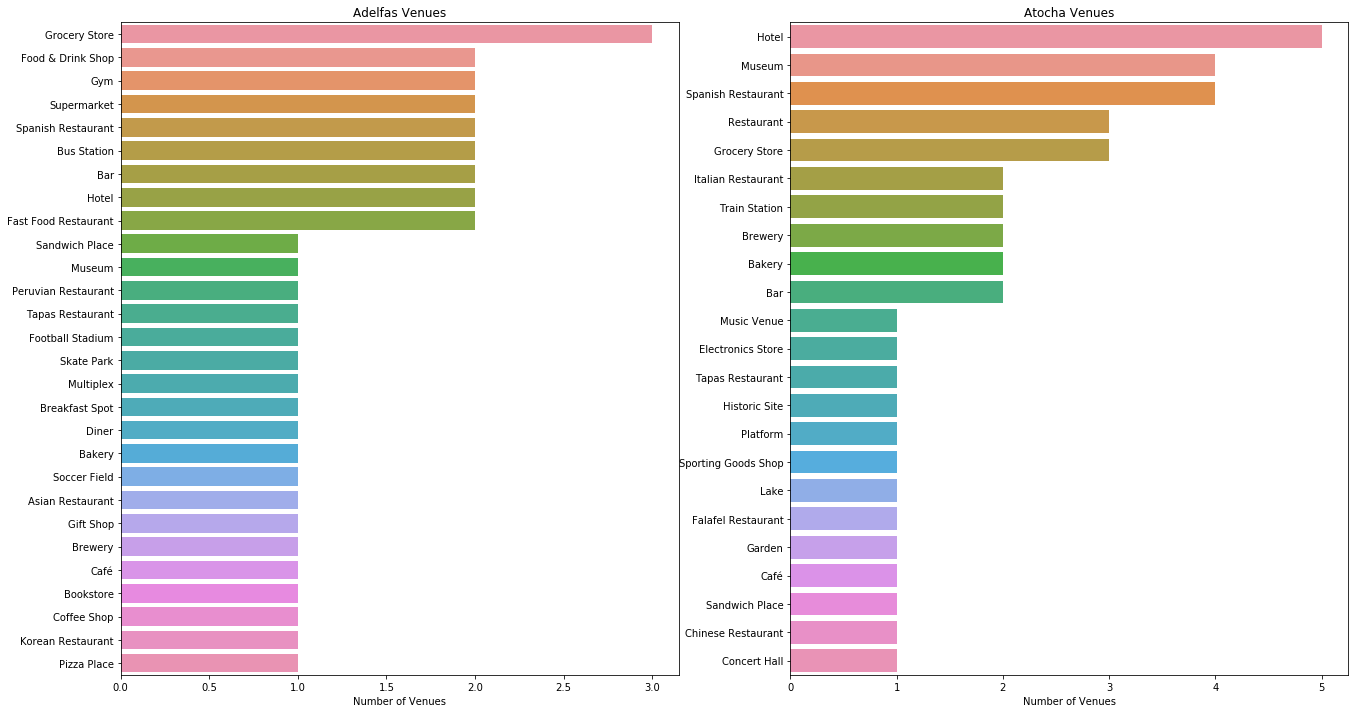

In [58]:
plt.figure(figsize=(22,12))

plt.subplot(1,2,1)
plt.title('Adelfas Venues')
sns.barplot(x=adelfas_venues_counts['Venue_Category'], y=adelfas_venues_counts.index)
plt.xlabel('Number of Venues')

plt.subplot(1,2,2)
plt.title('Atocha Venues')
sns.barplot(x=atocha_venues_counts['Venue_Category'], y=atocha_venues_counts.index)
plt.xlabel('Number of Venues')

plt.show()

### Adelfas has 11 restuarants/diners and Atocha has 12 restaurants

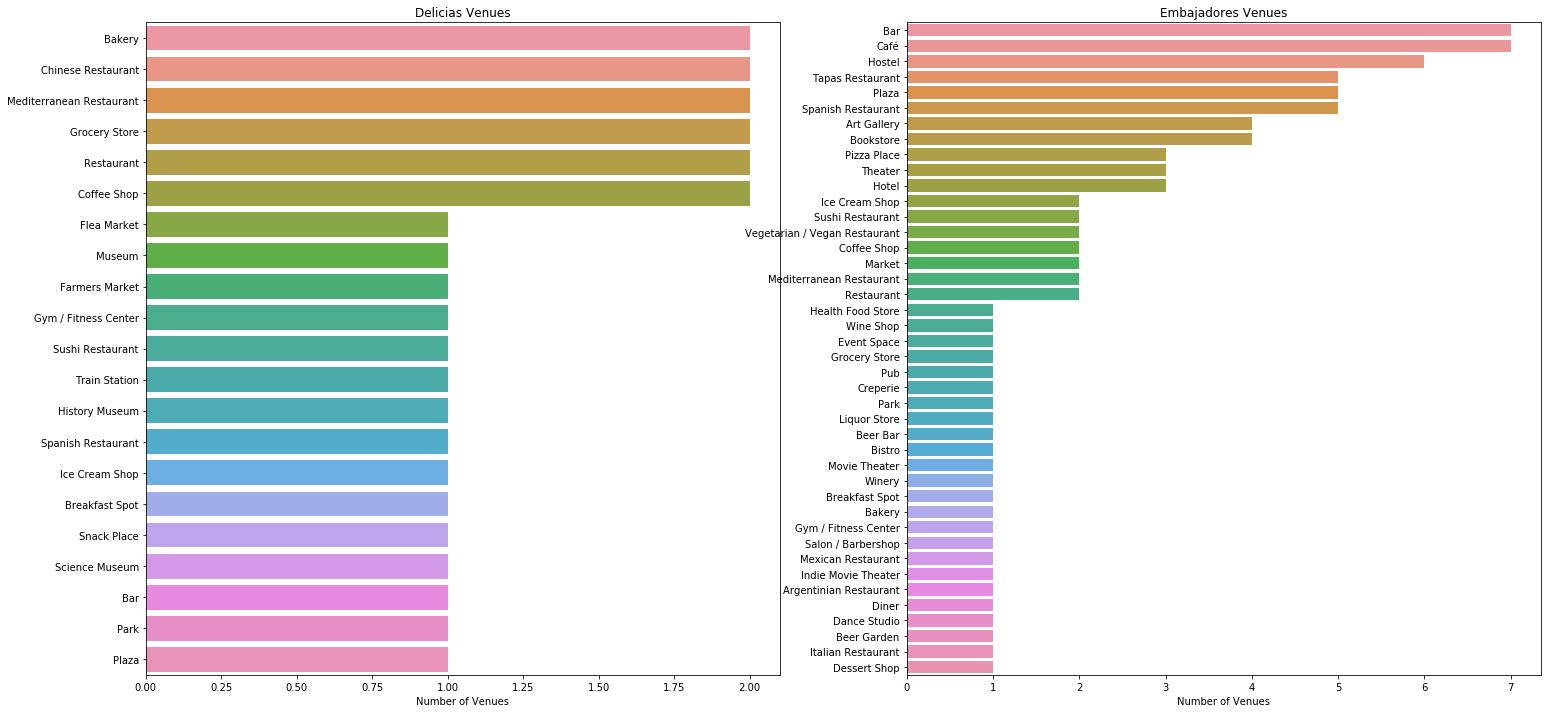

In [59]:
plt.figure(figsize=(25,12))

plt.subplot(1,2,1)
plt.title('Delicias Venues')
sns.barplot(x=delicias_venues_counts['Venue_Category'], y=delicias_venues_counts.index)
plt.xlabel('Number of Venues')

plt.subplot(1,2,2)
plt.title('Embajadores Venues')
sns.barplot(x=embajadores_venues_counts['Venue_Category'], y=embajadores_venues_counts.index)
plt.xlabel('Number of Venues')

plt.show()

### Delicias has 9 restaurants and Embajadores has 22 restaurants.

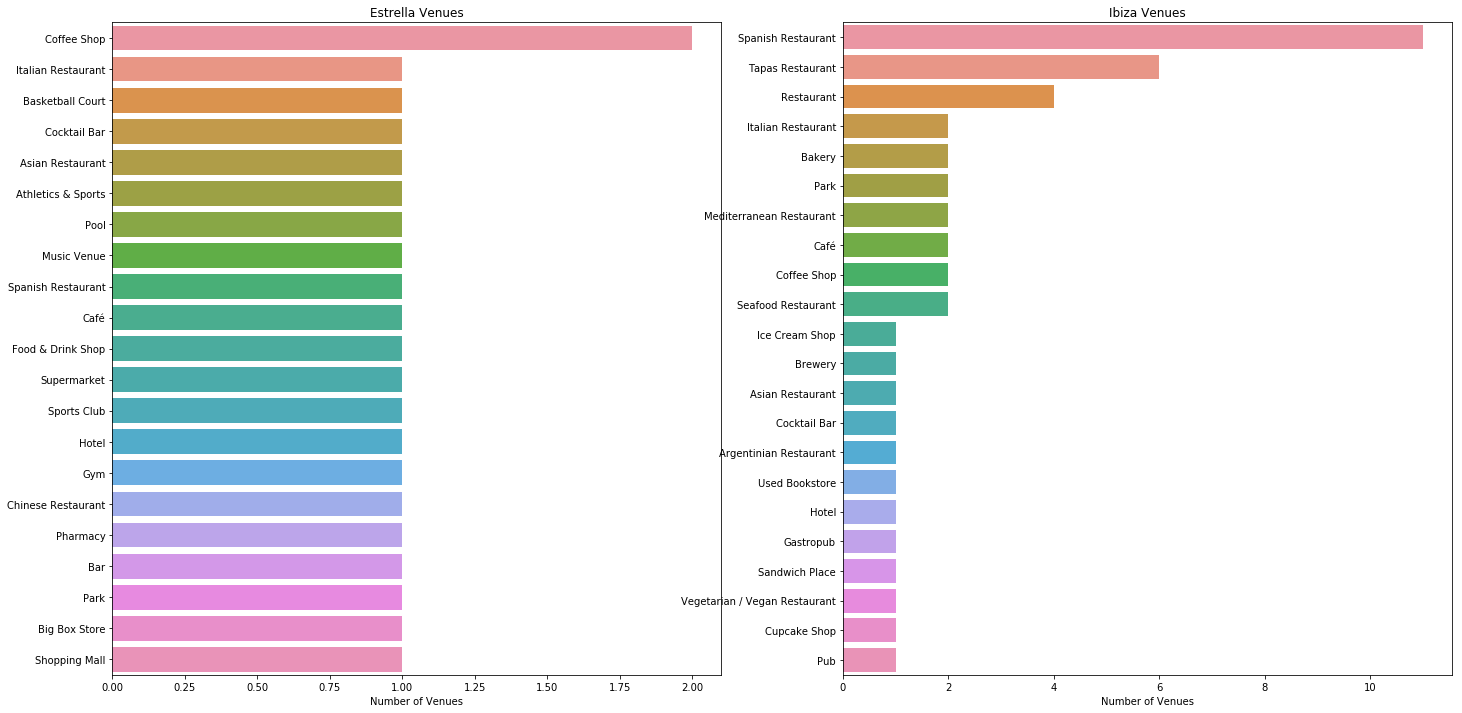

In [60]:
plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
plt.title('Estrella Venues')
sns.barplot(x=estrella_venues_counts['Venue_Category'], y=estrella_venues_counts.index)
plt.xlabel('Number of Venues')

plt.subplot(1,2,2)
plt.title('Ibiza Venues')
sns.barplot(x=ibiza_venues_counts['Venue_Category'], y=ibiza_venues_counts.index)
plt.xlabel('Number of Venues')

plt.show()

### Estrella has 6 restaurants while Ibiza has 30 restaurants in total

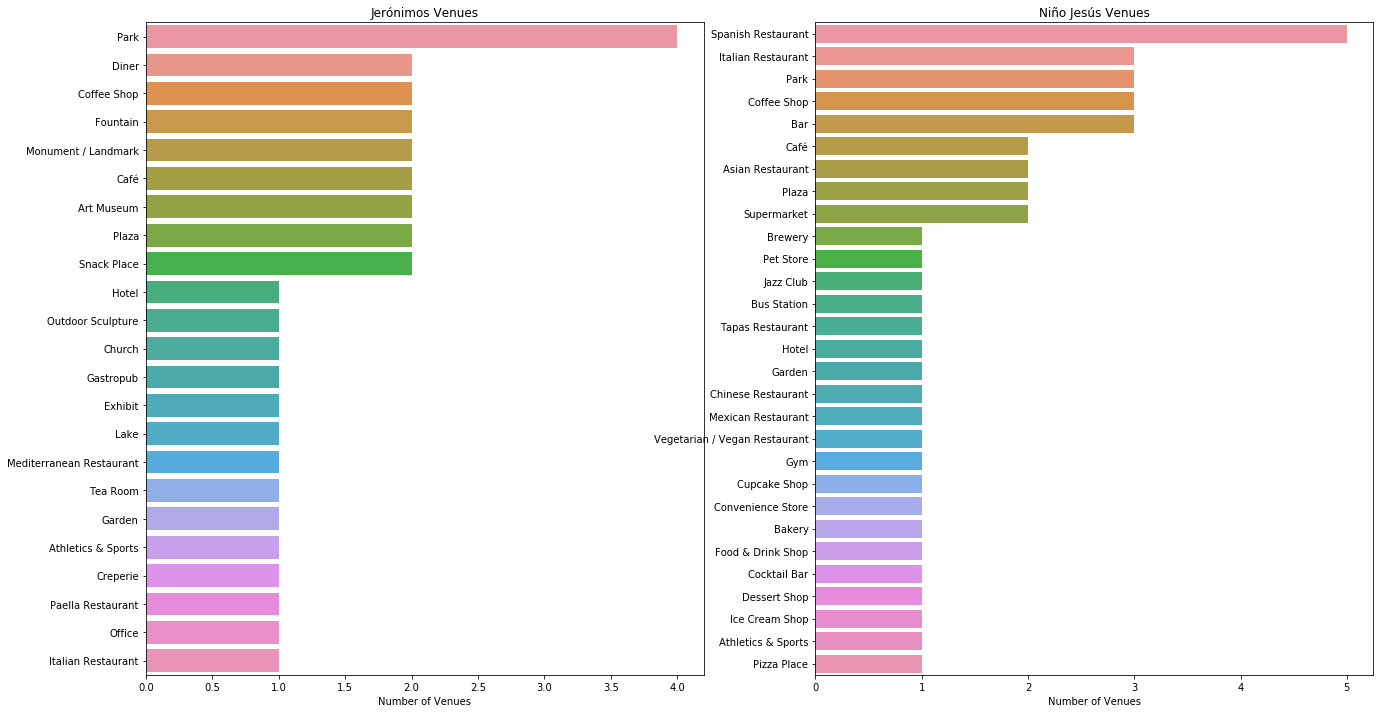

In [61]:
plt.figure(figsize=(22,12))

plt.subplot(1,2,1)
plt.title('Jerónimos Venues')
sns.barplot(x=jeronimos_venues_counts['Venue_Category'], y=jeronimos_venues_counts.index)
plt.xlabel('Number of Venues')

plt.subplot(1,2,2)
plt.title('Niño Jesús Venues')
sns.barplot(x=nino_venues_counts['Venue_Category'], y=nino_venues_counts.index)
plt.xlabel('Number of Venues')

plt.show()

### Jerónimos also has 6 restaurants and Niño Jesús has 14 restaurants

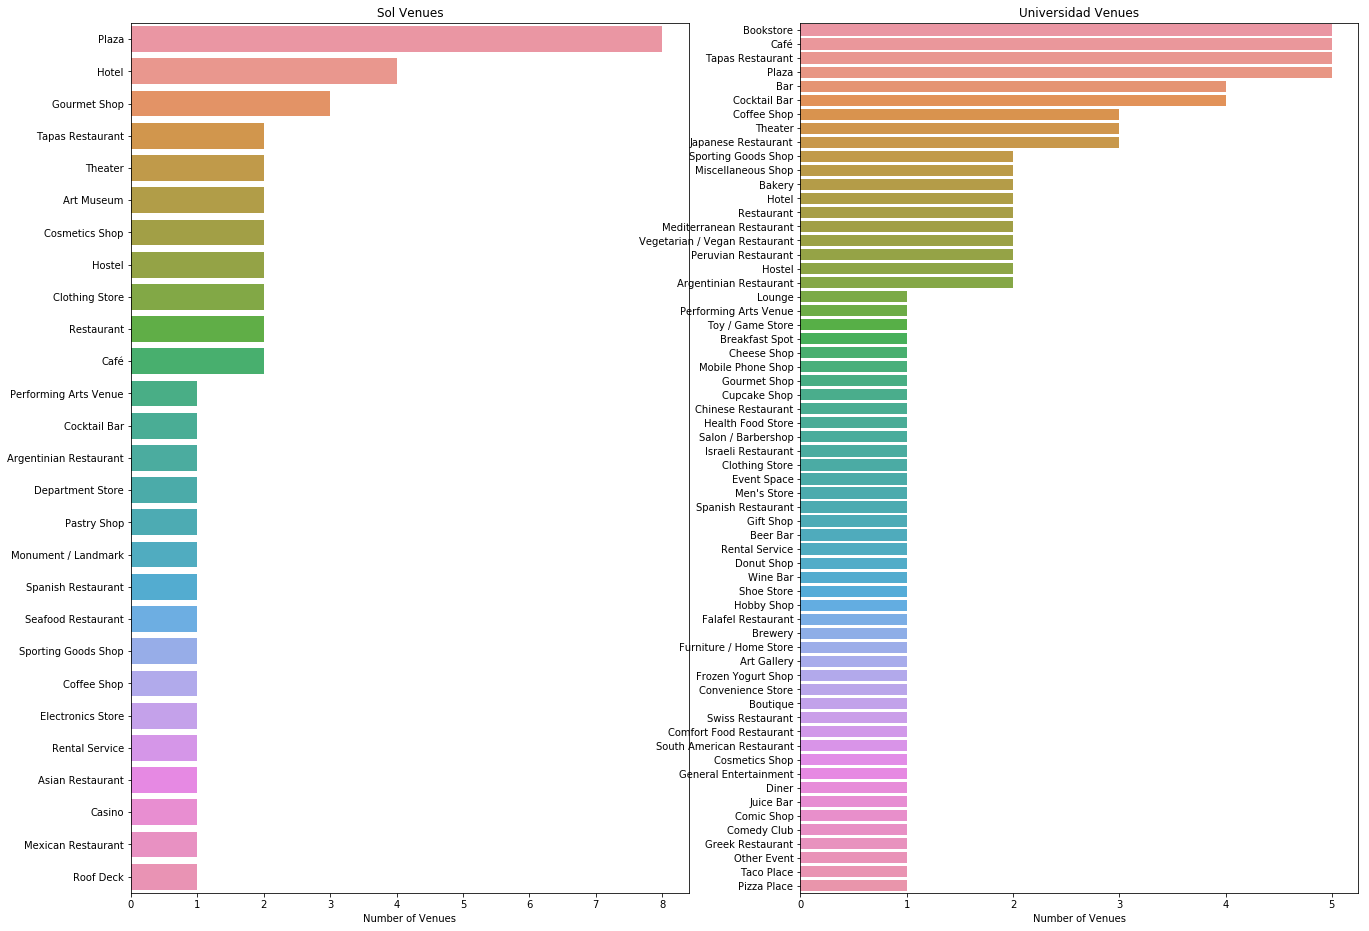

In [62]:
plt.figure(figsize=(22,16))

plt.subplot(1,2,1)
plt.title('Sol Venues')
sns.barplot(x=sol_venues_counts['Venue_Category'], y=sol_venues_counts.index)
plt.xlabel('Number of Venues')

plt.subplot(1,2,2)
plt.title('Universidad Venues')
sns.barplot(x=universidad_venues_counts['Venue_Category'], y=universidad_venues_counts.index)
plt.xlabel('Number of Venues')

plt.show()

### Sol has 9 restaurants while Universidad has a total of 30 restaurants

# Conclusion

The purpose of this project was to get an idea which neighborhood in Madrid would be best to open an American restaurant. According to the data, Jerónimos or Estrella are the two neighborhoods with the least competition with 6 restaurants each. I would recommend Jerónimos because the neighborhood is closer to the center so tourist as well as locals can have access to the restaurant and Jerónimos has very popular attractions in Madrid like the famous Prado Museum and Retiro Park. However the final decision on optimal restaurant location will be made by stakeholders and owners based on specific characteristics of neighborhoods and locations, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc. 